# SMS Spam Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3582,ham,I sent your maga that money yesterday oh.,NaN,NaN,NaN
1675,ham,Painful words- \I thought being Happy was the ...,the toughest is acting Happy with all unspoke...,NaN,NaN
4761,ham,Me too! Have a lovely night xxx,NaN,NaN,NaN
2546,ham,Company is very good.environment is terrific a...,NaN,NaN,NaN
1366,ham,Bbq this sat at mine from 6ish. Ur welcome 2 come,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

**Now lets start working with the data and make some amazing conclusions**

## 1. Data Cleaning
## 2. EDA
## 3. Data Preprocessing --vectorization,stemming,remove stop words
## 4. Model Building
## 5. Evaluate the model
## 6. Improve the model
## 7. Website
## 8. Deployment on Heroku


# *1. Data Cleaning*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# the above information shows that columns 2 3 4 have too much null values so it is good to drop it
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
#inplace= True because we permanently want to bring change in the original dataset
df.sample(5)

,v1,v2
2663,spam,8007 FREE for 1st week! No1 Nokia tone 4 ur mo...
2128,ham,Well I'm going to be an aunty!
4978,ham,Spending new years with my brother and his fam...
202,ham,Your account has been refilled successfully by...
2211,ham,Just gettin a bit arty with my collages at the...


In [7]:
# as the column names are not to descriptive lets rename the names of the columns
df.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)

In [8]:
df.sample(5)

,message_type,message
1884,ham,I love your ass! Do you enjoy doggy style? :)
1957,ham,Take something for pain. If it moves however t...
4044,ham,If You mean the website. Yes.
482,ham,Watching tv lor...
3568,ham,She's fine. Sends her greetings


In [9]:
# in the message type, they are classified as 'ham' and 'spam' but we want it as 1 and O so lets import Label Encoder

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

In [11]:
df['message_type']=encoder.fit_transform(df['message_type'])
df['message_type'].sample(5)

812     1
4774    0
2021    0
4564    0
3488    0
Name: message_type, dtype: int64

In [12]:
df[df['message_type']==1]
# there are 747 spam messages in the dataset

,message_type,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [13]:
#now lets check the missing values
df.isnull().sum()
# there are no missing values

message_type    0
message         0
dtype: int64

In [14]:
# now lets check for duplicated values
df.duplicated().sum()


403

*There are 403 duplicate values so we simply have to remove those values* 

In [15]:
#remove the duplicates
df= df.drop_duplicates()

In [16]:
df.duplicated().sum()

0

# 2. Exploratory Data Analysis

### *Lets visualize this classification problem to get a better understanding of the data*

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
df['message_type'].value_counts()

0    4516
1     653
Name: message_type, dtype: int64

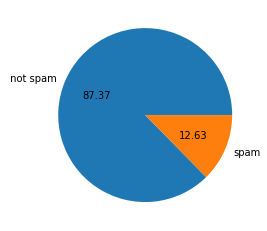

In [19]:
plt.pie(df['message_type'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

### there is imbalance in data

In [20]:
# no. of alphabets in the data
# no. of sentences in the data
# no. of words in the data

### *Now lets make 3 new columns in the data depicting the no. of characters,words and sentences*

In [21]:
#natural language tool kit
import nltk

In [22]:
#find the number of alpha numeric characters in the messages column
df['num_characters']=df['message'].apply(len)
df.head()

,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
#fetch number of words using NLTK
from nltk.tokenize import word_tokenize
#word tokenization
df['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy.., Availab...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [24]:
#now find the length of each of the list to get the total number of words in each list
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

,message_type,message,num_characters,num_words
1943,0,I got lousy sleep. I kept waking up every 2 ho...,120,31
1610,0,I'll probably be around mu a lot,32,8
1376,0,Auntie huai juan never pick up her phone,40,8
4088,0,"How are you, my Love ? Are you with your broth...",147,33
79,0,Its not the same here. Still looking for a job...,76,20


In [25]:
#finding number of sentences
df['num_sentences']=df['message'].apply(lambda x: nltk.sent_tokenize(x))
df.sample(5)

,message_type,message,num_characters,num_words,num_sentences
814,1,U were outbid by simonwatson5120 on the Shinco...,133,27,[U were outbid by simonwatson5120 on the Shinc...
2422,0,A bloo bloo bloo I'll miss the first bowl,41,10,[A bloo bloo bloo I'll miss the first bowl]
3937,0,WHEN THE FIRST STRIKE IS A RED ONE. THE BIRD +...,158,29,"[WHEN THE FIRST STRIKE IS A RED ONE., THE BIRD..."
1930,0,Carry on not disturbing both of you,35,7,[Carry on not disturbing both of you]
3018,0,Wat time do u wan 2 meet me later?,34,10,[Wat time do u wan 2 meet me later?]


In [26]:
#finding no. of sentences
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(5)

,message_type,message,num_characters,num_words,num_sentences
5404,0,Pls give her prometazine syrup. 5mls then &lt...,69,19,2
2892,0,K I'll be sure to get up before noon and see w...,56,15,1
2280,0,R Ì_ comin back for dinner?,27,7,1
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
3921,0,"Oh really? perform, write a paper, go to a mov...",78,21,2


In [27]:
#lets test the describe function on the new 3 columns
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


### For 'ham' messages

In [28]:
# lets check describe() for both ham and spam individually
df[df['message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


### For 'spam' messages

In [29]:
df[df['message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000



#### we can clearly see the spam messages are quite longer than the ham messages

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

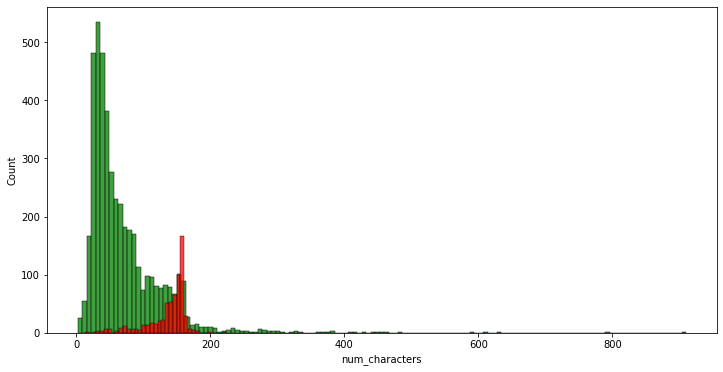

In [30]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_characters'],color='green')
sns.histplot(df[df['message_type']==1]['num_characters'],color = 'red')


<AxesSubplot:xlabel='num_words', ylabel='Count'>

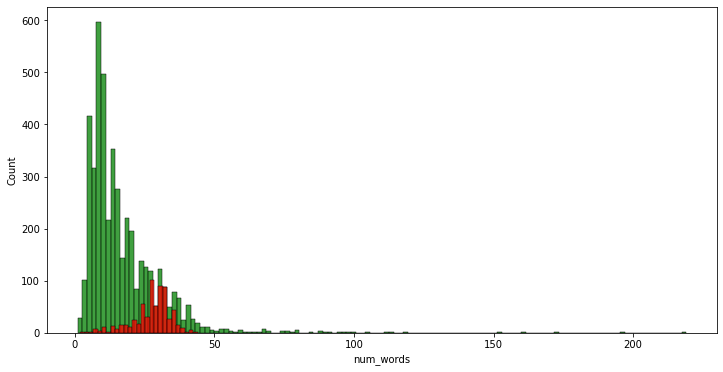

In [31]:
#for words
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_words'],color='green')
sns.histplot(df[df['message_type']==1]['num_words'],color='red')

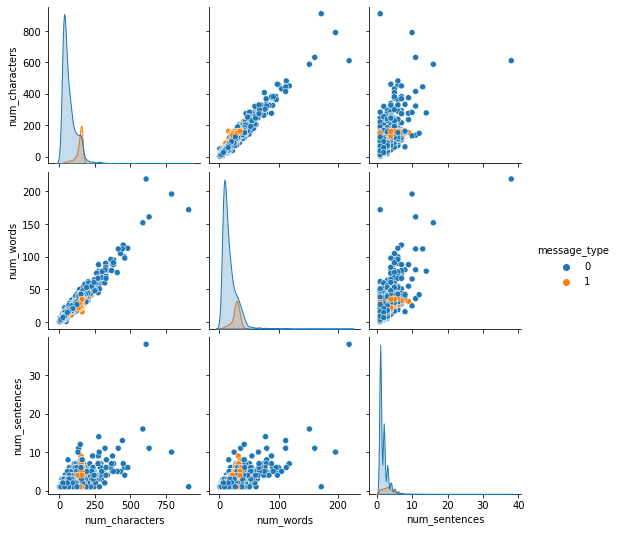

In [32]:
#plot pairplots for ham and spam
sns.pairplot(df,hue='message_type')

In [33]:
#find correlation
df.corr()

,message_type,num_characters,num_words,num_sentences
message_type,1.000000,0.384717,0.264198,0.267602
num_characters,0.384717,1.000000,0.965307,0.626118
num_words,0.264198,0.965307,1.000000,0.683561
num_sentences,0.267602,0.626118,0.683561,1.000000


<AxesSubplot:>

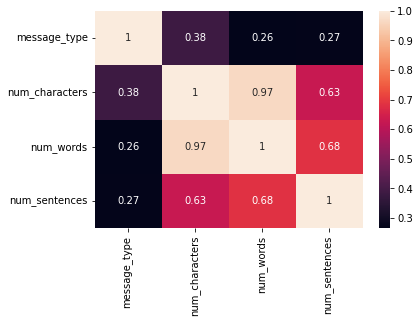

In [34]:
#plotting a heatmap for the correlation
sns.heatmap(df.corr(),annot=True)

*As we see multicollinearity here, we cannot use all three columns instead we shall use only one and that should be mun_characters has it has highest correlation with message_type*

# 3. Data Preprocessing

### 3.1 LowerCase
### 3.2 Tokenisation
### 3.3 Removing special characters
### 3.4 Removing stop words and punctuation
### 3.5 Stemming --lemmetization

In [35]:
def text_transform(message):
    message=message.lower() #change to lowercase
    message=nltk.word_tokenize(message)#tokenization  and after that text is converted to a list
    #so we run a loop in the message text
    y=[] #creating empty list to append
    for i in message:
        if i.isalnum():
            y.append(i)
    return y

In [36]:
text_transform("THis is a SMS spam CLassifier $3000") ##see here the special character $ is ignored

['this', 'is', 'a', 'sms', 'spam', 'classifier', '3000']

In [37]:
## Removing stop words and punctuations
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english'))


179

*This shows there are 179 stopwords in the english language in this library*